Wczytanie Bibliotek

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Wczytanie Danych

In [2]:
cars = pd.read_csv("Car_Prices_Poland_Kaggle.csv",index_col=0)

In [3]:
cars.head()

,mark,model,generation_name,year,mileage,vol_engine,fuel,city,province,price
0,opel,combo,gen-d-2011,2015,139568,1248,Diesel,Janki,Mazowieckie,35900
1,opel,combo,gen-d-2011,2018,31991,1499,Diesel,Katowice,Śląskie,78501
2,opel,combo,gen-d-2011,2015,278437,1598,Diesel,Brzeg,Opolskie,27000
3,opel,combo,gen-d-2011,2016,47600,1248,Diesel,Korfantów,Opolskie,30800
4,opel,combo,gen-d-2011,2014,103000,1400,CNG,Tarnowskie Góry,Śląskie,35900


In [4]:
cars.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 117926 entries, 0 to 117926
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   mark             117926 non-null  object
 1   model            117926 non-null  object
 2   generation_name  87841 non-null   object
 3   year             117926 non-null  int64 
 4   mileage          117926 non-null  int64 
 5   vol_engine       117926 non-null  int64 
 6   fuel             117926 non-null  object
 7   city             117926 non-null  object
 8   province         117926 non-null  object
 9   price            117926 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 9.9+ MB


In [5]:
cars.count()

mark               117926
model              117926
generation_name     87841
year               117926
mileage            117926
vol_engine         117926
fuel               117926
city               117926
province           117926
price              117926
dtype: int64

In [6]:
cars.isnull().sum()

mark                   0
model                  0
generation_name    30085
year                   0
mileage                0
vol_engine             0
fuel                   0
city                   0
province               0
price                  0
dtype: int64

In [7]:
cars[cars['generation_name'].isnull()]

,mark,model,generation_name,year,mileage,vol_engine,fuel,city,province,price
189,opel,adam,NaN,2013,101514,1398,Gasoline,Warszawa,Mazowieckie,29900
190,opel,adam,NaN,2014,98317,1398,LPG,Janki,Mazowieckie,36900
191,opel,adam,NaN,2017,96511,1364,Gasoline,Warszawa,Mazowieckie,48900
192,opel,adam,NaN,2013,141399,1398,Gasoline,Warszawa,Mazowieckie,31300
193,opel,adam,NaN,2014,60936,1398,Gasoline,Warszawa,Mazowieckie,40900
...,...,...,...,...,...,...,...,...,...,...
116898,volvo,xc-70,NaN,2012,168000,2400,Diesel,Skoki,Wielkopolskie,77900
116899,volvo,xc-70,NaN,2008,238000,3192,LPG,Hrubieszów,Lubelskie,34900
116900,volvo,xc-70,NaN,2017,91000,2400,Diesel,Chechło Pierwsze,Łódzkie,145900
116901,volvo,xc-70,NaN,2006,348650,2400,Diesel,Płock,Mazowieckie,19900


In [8]:
cars_noNaN = cars.dropna().copy()

In [9]:
cars_noNaN.count()

mark               87841
model              87841
generation_name    87841
year               87841
mileage            87841
vol_engine         87841
fuel               87841
city               87841
province           87841
price              87841
dtype: int64

In [10]:
cars_noNaN

,mark,model,generation_name,year,mileage,vol_engine,fuel,city,province,price
0,opel,combo,gen-d-2011,2015,139568,1248,Diesel,Janki,Mazowieckie,35900
1,opel,combo,gen-d-2011,2018,31991,1499,Diesel,Katowice,Śląskie,78501
2,opel,combo,gen-d-2011,2015,278437,1598,Diesel,Brzeg,Opolskie,27000
3,opel,combo,gen-d-2011,2016,47600,1248,Diesel,Korfantów,Opolskie,30800
4,opel,combo,gen-d-2011,2014,103000,1400,CNG,Tarnowskie Góry,Śląskie,35900
...,...,...,...,...,...,...,...,...,...,...
117922,volvo,xc-90,gen-ii-2014-xc-90,2020,40000,1969,Hybrid,Katowice,Śląskie,222790
117923,volvo,xc-90,gen-ii-2014-xc-90,2017,51000,1969,Diesel,Chechło Pierwsze,Łódzkie,229900
117924,volvo,xc-90,gen-ii-2014-xc-90,2016,83500,1969,Gasoline,Pruszcz Gdański,Pomorskie,135000
117925,volvo,xc-90,gen-ii-2014-xc-90,2017,174000,1969,Diesel,Kalisz,Wielkopolskie,154500


Liczba różnych marek samochodów

<AxesSubplot:>

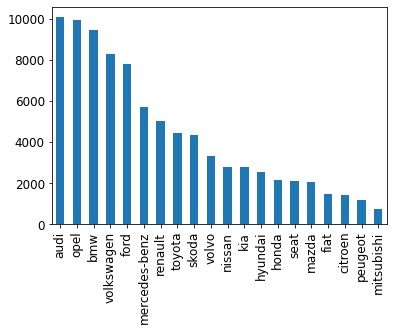

In [75]:
data = cars_noNaN["mark"].value_counts()
data.sort_values(ascending=False).plot.bar(fontsize="12", xlabel="")

Średnia cena samochodu dla województwa

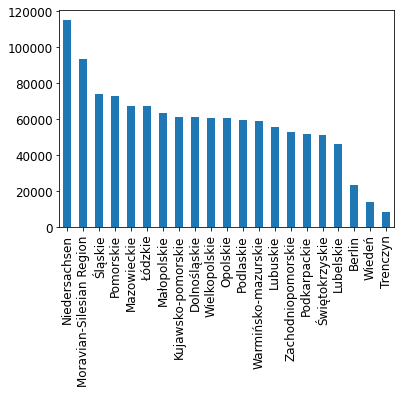

In [52]:
data = cars_noNaN.groupby("province").mean()["price"]
data.sort_values(ascending=False).plot.bar(fontsize="12",xlabel="")
plt.show()

Top 5 Najdroższych Aut 

In [13]:
cars_noNaN["price"].nlargest(n=5)

61836    2399900
61646    1966770
61810    1550000
61015    1075000
62028    1036270
Name: price, dtype: int64

Liczba Wyprodukowanych Aut Rocznie

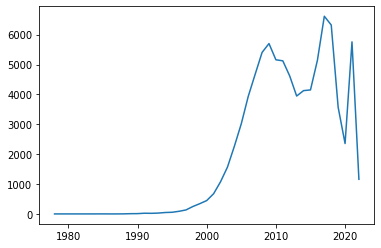

In [54]:
data = cars_noNaN.value_counts("year").sort_index()
plt.plot(data)
plt.show()

Podział ze względu na rodzaj zasilania

In [15]:
fuels = cars_noNaN.value_counts("fuel")
fuels

fuel
Gasoline    44278
Diesel      38002
LPG          3482
Hybrid       1939
Electric       96
CNG            44
dtype: int64

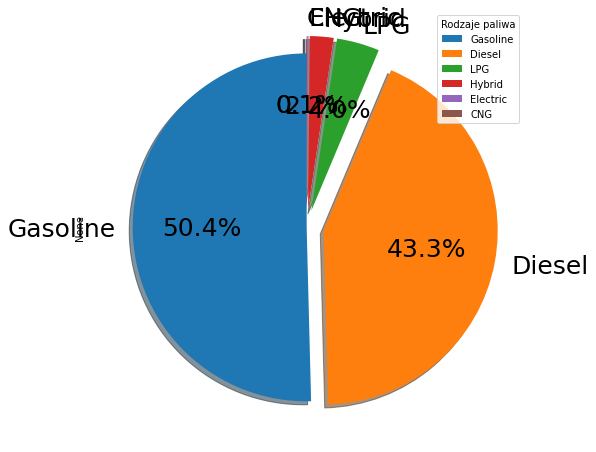

In [16]:
explode = (0, 0.1, 0.1, 0.1, 0.1, 0.1)
plot = cars_noNaN.value_counts("fuel").plot.pie(explode=explode,figsize=(8, 8),autopct='%1.1f%%',textprops={'fontsize': 25},shadow=True,startangle = 90)
plt.legend(title="Rodzaje paliwa")
plt.show()

Zmiana na przestrzeni lat ze względu na rodzaj zasilania

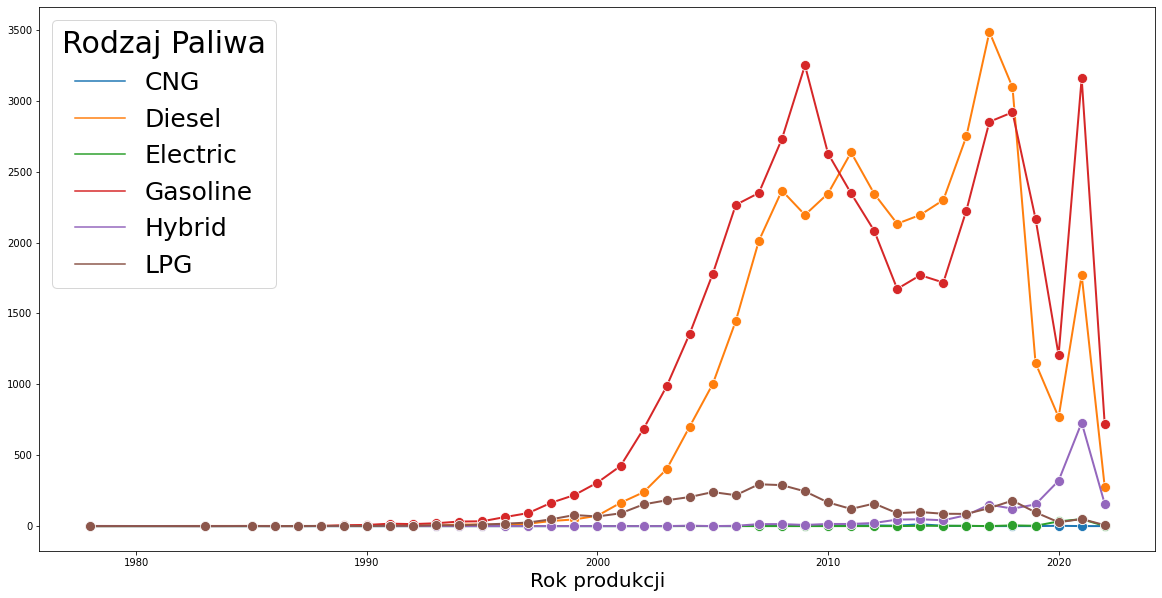

In [84]:
engine = cars_noNaN[["year","fuel"]].value_counts().unstack().fillna(0)
plt.figure(figsize=(20,10))
sns.lineplot(data=engine,marker = "o",markersize=10,linewidth=2,dashes=False)
plt.xlabel("Rok produkcji",fontsize=20)
#plt.xticks(fontsize=16)
#plt.yticks(fontsize=16)
plt.legend(title="Rodzaj Paliwa",title_fontsize=30,fontsize=25)
plt.show()

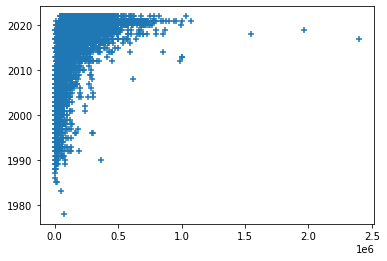

In [68]:
plt.scatter(x='price',y='year',data=cars_noNaN, marker='+')
plt.show()

Z wykresu możemy wywnioskować że wraz z rokiem wzrasta maksymalna cena auta, ale nie możemy powiedzieć że wraz z rokiem wzrasta cena auta.

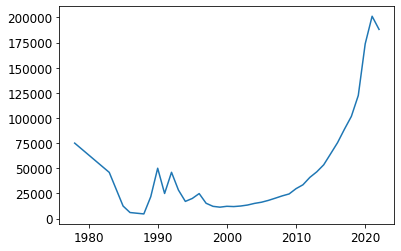

In [74]:
data = cars_noNaN.groupby("year").mean()["price"]
data.plot(fontsize="12",xlabel="")
plt.show()